In [1]:
%matplotlib inline

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
def logToMsgs(name):
    file = open(name)
    comments = 0
    while True:
        line = file.readline()
        if not line:
            break
        elif not line.startswith('#'):
            arr = line.strip().split(',')
            yield [(int(x) % 256) for x in arr[:-1]]

In [78]:
msgs0_1 = list(logToMsgs('../resources/logs/0.1.log'))
msgs4_5 = list(logToMsgs('../resources/logs/4.5-new.log'))
msgs4_6 = list(logToMsgs('../resources/logs/4.6-new.log'))
msgs4_1 = list(logToMsgs('../resources/logs/4.1.log'))

ids0_1 = np.array([msg[0] for msg in msgs0_1])
ids4_5 = np.array([msg[0] for msg in msgs4_5])
ids4_6 = np.array([msg[0] for msg in msgs4_6])
ids4_1 = np.array([msg[0] for msg in msgs4_1])



(0, 100)

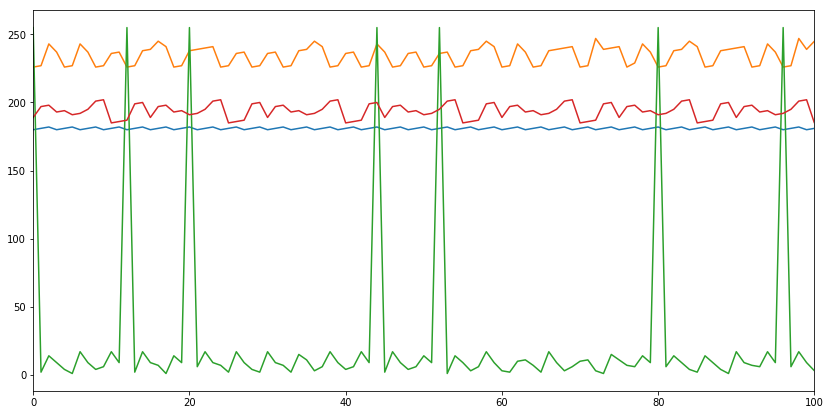

In [79]:
plt.figure(2, figsize=(14,7))
plt.plot(ids0_1)
plt.plot(ids4_5)
plt.plot(ids4_6)
plt.plot(ids4_1)
plt.xlim(0,100)

(0, 10000)

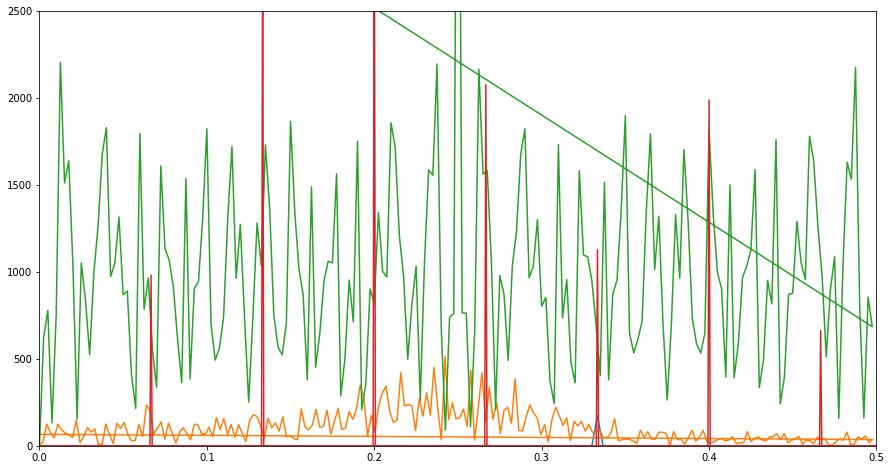

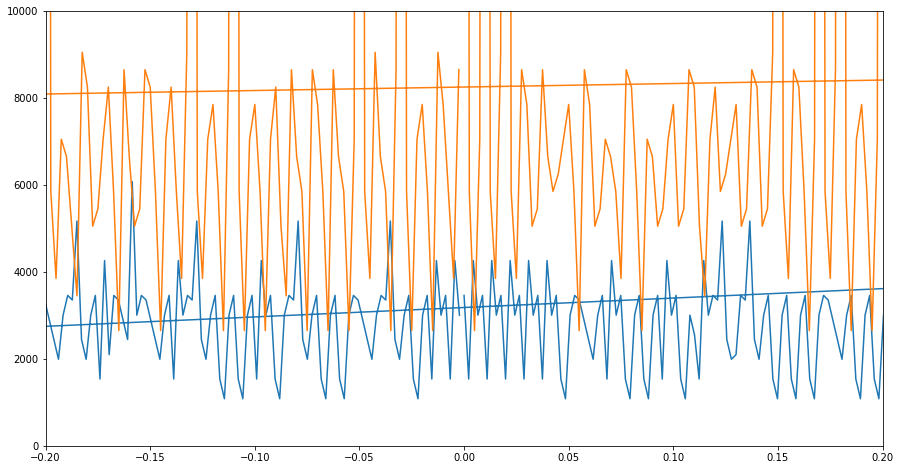

In [83]:
#See if there are patterns repeating, using FFT on the IDS
fftID0_1 = np.fft.fft(ids0_1-np.mean(ids0_1))
fftID4_5 = np.fft.fft(ids4_5-np.mean(ids4_5))
fftID4_6 = np.fft.fft(ids4_6-np.mean(ids4_6))
fftID4_1 = np.fft.fft(ids4_1-np.mean(ids4_1))

plt.figure(10, figsize=(15,8))
plt.plot(np.fft.fftfreq(fftID0_1.size),np.abs(fftID0_1))
plt.plot(np.fft.fftfreq(fftID4_5.size),np.abs(fftID4_5))
plt.plot(np.fft.fftfreq(fftID4_6.size),np.abs(fftID4_6))
plt.plot(np.fft.fftfreq(fftID4_1.size),np.abs(fftID4_1))
plt.xlim((0,0.5))
plt.ylim((0,2500))

#Just for fun, not sure it makes any kind of sense...?
fftfftID4_5 = np.fft.fft(np.fft.fft(ids4_5-np.mean(ids4_5)))
fftfftID4_6 = np.fft.fft(np.fft.fft(ids4_6-np.mean(ids4_6)))
plt.figure(11, figsize=(15,8))
plt.plot(np.fft.fftfreq(fftfftID4_5.size),np.abs(fftfftID4_5))
plt.plot(np.fft.fftfreq(fftfftID4_6.size),np.abs(fftfftID4_6))
plt.xlim((-0.2,0.2))
plt.ylim((0,10000))

In [25]:
def compute_corr(ids):

    N = ids.size

    #cors = np.zeros(2*N-1)

    for i in range(0,2*N-1):
        n = i-N+1
        if (n < 0):
            sig1 = ids[-n:]
            sig2 = ids[:n]
        elif (n == 0):
            sig1 = ids
            sig2 = ids
        else:
            sig1 = ids[:-n]
            sig2 = ids[n:]
        # Remove mean
        sig1 = sig1-np.mean(sig1)
        sig2 = sig2-np.mean(sig2)
        corr = np.sum(sig1*sig2)
        # Normalize
        std = np.sqrt(np.sum(sig1*sig1)*np.sum(sig2*sig2))
        if (std > 0):
            corr = corr/std
        #cors[i] = corr
        yield corr



(75, 125)

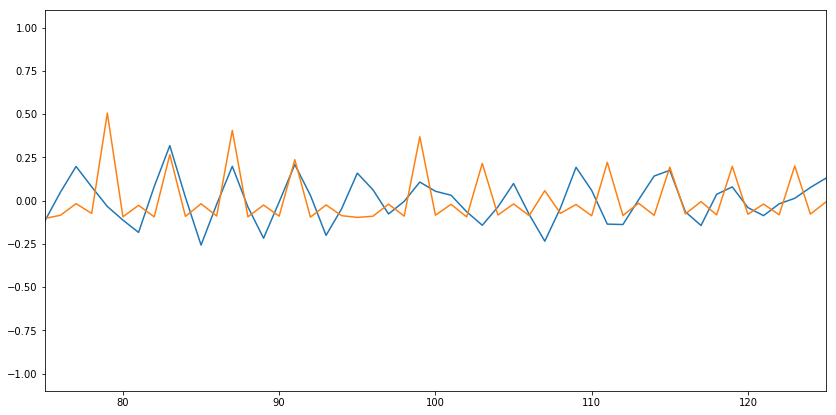

In [85]:
#Not sure what we can see here that we cannot see in the firt FFT... 
#The shift of 3 messages in the non-diversified version is shown by the peak at 1/3Hz in the FFT
#If we want to correlate something, I guess we should look at two (or n) different diversified implementations
#and see if we can learn something more than with just one.
plt.figure(5, figsize=(14,7))
cors0_1 = list(compute_corr(ids0_1))
cors4_5 = list(compute_corr(ids4_5))
cors4_6 = list(compute_corr(ids4_6))
cors4_1 = list(compute_corr(ids4_1))
#plt.plot(cors0_1)
plt.plot(cors4_5)
plt.plot(cors4_6)
#plt.plot(cors4_1)
plt.xlim(75,125)

(0, 75)

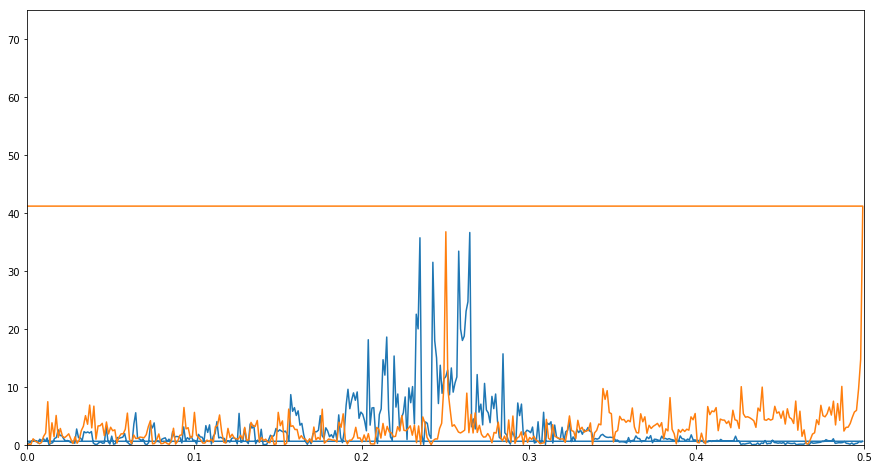

In [86]:
#Not sure this makes sense...? Anyway, the first FFT on IDS looks quite similar, and 
#can be explained more easily.
fft0_1 = np.fft.fft(cors0_1-np.mean(cors0_1))
fft4_5 = np.fft.fft(cors4_5-np.mean(cors4_5))
fft4_6 = np.fft.fft(cors4_6-np.mean(cors4_6))
fft4_1 = np.fft.fft(cors4_1-np.mean(cors4_1))

plt.figure(3, figsize=(15,8))
#plt.plot(np.fft.fftfreq(fft0_1.size),np.abs(fft0_1))
plt.plot(np.fft.fftfreq(fft4_5.size),np.abs(fft4_5))
plt.plot(np.fft.fftfreq(fft4_6.size),np.abs(fft4_6))
#plt.plot(np.fft.fftfreq(fft4_1.size),np.abs(fft4_1))
plt.xlim((0,0.5))
plt.ylim((0,75))

(array([ 362.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,   18.]),
 array([ 2. ,  2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ]),
 <a list of 10 Patch objects>)

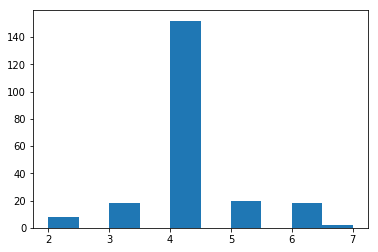

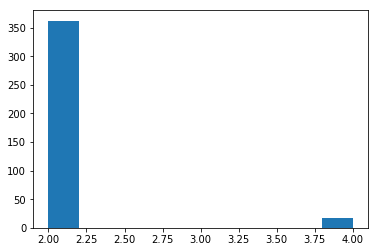

In [95]:
def DT(cors):
    peaks = np.zeros_like(cors)

    for n in range(1,peaks.size-1):
        if cors[n-1] < cors[n] and cors[n] > cors[n+1]:
            peaks[n] = 1

    #DT = np.diff(np.where(peaks == 1)[0])
    return np.diff(np.where(peaks == 1)[0])
        
plt.figure(9)
#plt.hist(DT(cors0_1))
plt.hist(DT(cors4_5))
plt.figure(12)
plt.hist(DT(cors4_6))
#plt.hist(DT(cors4_1))

(array([ 0.,  0.,  0.,  0.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.]),
 array([ -0.5,   0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,
          8.5,   9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,
         17.5,  18.5]),
 <a list of 19 Patch objects>)

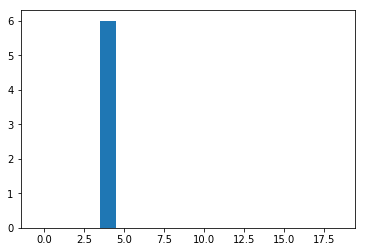

In [8]:
tops = np.where(cors > 0.95)[0]
dt = np.diff(tops);

plt.figure(8)
plt.hist(dt, bins=np.arange(0,20)-.5)

#ids.size/3

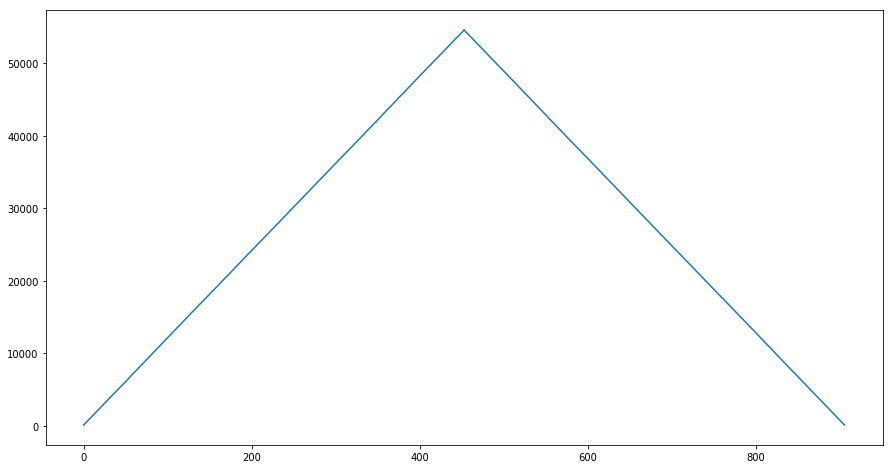

In [9]:
idsn = (ids-np.min(ids))/(np.max(ids)-np.min(ids))



corr = np.correlate(ids, ids, mode='full')

plt.figure(1, figsize=(15,8))
plt.plot(corr/idsn.size)
#plt.ylim((0,1))
#plt.xlim(0,30)


In [10]:
ids.shape

(454,)

In [11]:
ids2 = np.interp(np.arange(0,1500*1000)/1000, np.arange(0,1500), ids)

IDS = np.fft.fft(ids2-np.mean(ids2))

plt.figure(3, figsize=(15,8))
plt.plot(np.fft.fftfreq(ids2.size),np.abs(IDS))
plt.xlim((-1/15,1/15))

ValueError: fp and xp are not of the same length.

In [32]:
print(corr)

[9828500]
